<a href="https://colab.research.google.com/github/ranjan-vaidya/EDA_TERRORISM/blob/master/DenseNet_acc_81_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
 ! mkdir ~/.kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ranjanvaidya47","key":"2d591abf3b1a86ef2d228d2054ecdecb"}'}

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide           8KB  2023-02-01 12:22:51          10832        356  1.0              
naveenkumar20bps1137/walmart-sales-analysis              WALMART SALES ANALYSIS                   119KB  2023-03-03 18:02:11           1258         40  0.9411765        
datascientistanna/customers-dataset                      Shop Customer Data                        23KB  2023-02-07 18:42:21           9227        214  1.0              
ulrikthygepedersen/co2-emissions-by-country              CO2 Emissions                            114KB  2023-02-28 12:39:49            746         26

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:59<00:00, 44.6MB/s]
100% 2.29G/2.29G [00:59<00:00, 41.6MB/s]


In [8]:
! unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [9]:
!pwd

/content


In [11]:
import tensorflow
import pandas as pd
import numpy as np
import os
import keras
from tensorflow.keras.applications import DenseNet169, DenseNet121, MobileNet, InceptionV3
from keras.applications import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet121


from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

In [12]:
base_model = DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)
# base_model = DenseNet121(
#     input_shape=(180, 180, 3),
#      include_top=False,
#       weights='imagenet',
#        pooling='avg'
# )

# inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')





# base_model.summary()

29084464/29084464 [==============================] - 1s 0us/step


In [13]:
training_dir='./chest_xray/train/'
validation_dir='./chest_xray/val/'
test_dir='./chest_xray/test/'

In [14]:
test_ds = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=16,
    image_size=(224, 224),
    )

Found 624 files belonging to 2 classes.


In [15]:
train_ds = image_dataset_from_directory(
    directory=training_dir,
    shuffle=True,
    labels='inferred',
    label_mode='binary',
    batch_size=16,
    image_size=(224, 224),
    )

Found 5216 files belonging to 2 classes.


In [16]:
validation_ds = image_dataset_from_directory(
    directory=validation_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=16,
    image_size=(224, 224),
    )


Found 16 files belonging to 2 classes.


In [18]:
data_augmentation = tensorflow.keras.Sequential([
  tensorflow.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tensorflow.keras.layers.experimental.preprocessing.RandomRotation(0.1),
])

In [19]:
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [20]:
x=base_model.output

x= data_augmentation(x)
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.6)(x)
# x= Dense(1024,activation='relu')(x) 
x= Dense(512,kernel_regularizer=regularizers.l2(0.0001), activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.6)(x)

preds=Dense(2,activation='softmax')(x)

# inception_model = Sequential([
#         inception_base_model,
#         GlobalAveragePooling2D(),
#         Dense(512, activation="relu"),
#         BatchNormalization(),
#         Dropout(0.6),
#         Dense(128, activation="relu"),
#         BatchNormalization(),
#         Dropout(0.4),
#         Dense(64,activation="relu"),
#         BatchNormalization(),
#         Dropout(0.3),
#         Dense(1,activation="sigmoid")
#     ])

#     opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#     METRICS = [
#         'accuracy',
#         tf.keras.metrics.Precision(name='precision'),
#         tf.keras.metrics.Recall(name='recall')
#     ]
#     inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)



In [21]:
model=Model(inputs=base_model.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
# for layer in model.layers[:-8]:
#     layer.trainable=False

# for layer in model.layers[-8:]:
#     layer.trainable=True


In [22]:
base_model.trainable = False

In [23]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [24]:
len(model.trainable_variables)

8

In [25]:
initial_epochs = 20

In [26]:
history=model.fit(x=train_ds,
                           validation_data=validation_ds,
                           epochs=initial_epochs,
                           verbose=1)





Epoch 1/20


326/326 [==============================] - 69s 149ms/step - loss: 0.8010 - accuracy: 0.7404 - val_loss: 0.7587 - val_accuracy: 0.7500
Epoch 2/20
326/326 [==============================] - 45s 137ms/step - loss: 0.5320 - accuracy: 0.8299 - val_loss: 0.7524 - val_accuracy: 0.7500
Epoch 3/20
326/326 [==============================] - 47s 141ms/step - loss: 0.4131 - accuracy: 0.8700 - val_loss: 0.9241 - val_accuracy: 0.6875
Epoch 4/20
326/326 [==============================] - 45s 136ms/step - loss: 0.3620 - accuracy: 0.8848 - val_loss: 0.9925 - val_accuracy: 0.6875
Epoch 5/20
326/326 [==============================] - 46s 137ms/step - loss: 0.3298 - accuracy: 0.8951 - val_loss: 1.0286 - val_accuracy: 0.6875
Epoch 6/20
326/326 [==============================] - 45s 136ms/step - loss: 0.3299 - accuracy: 0.9009 - val_loss: 1.0171 - val_accuracy: 0.6250
Epoch 7/20
326/326 [==============================] - 47s 141ms/step - loss: 0.2958 - accuracy: 0.9137 - val_loss: 0.9112 - val_accuracy: 0.6

In [27]:
score = model.evaluate(test_ds, verbose = 1) 

39/39 [==============================] - 4s 77ms/step - loss: 0.7385 - accuracy: 0.7933


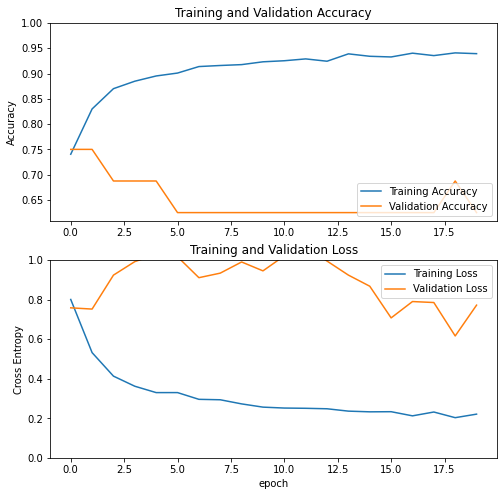

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [29]:
base_model.trainable = True

In [30]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 42

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  427


In [31]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
len(model.trainable_variables)

337

In [33]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

Epoch 20/40


326/326 [==============================] - 155s 258ms/step - loss: 0.3936 - accuracy: 0.8760 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 21/40
326/326 [==============================] - 81s 245ms/step - loss: 0.2172 - accuracy: 0.9385 - val_loss: 0.2624 - val_accuracy: 0.9375
Epoch 22/40
326/326 [==============================] - 82s 247ms/step - loss: 0.1920 - accuracy: 0.9480 - val_loss: 0.2234 - val_accuracy: 0.9375
Epoch 23/40
326/326 [==============================] - 82s 251ms/step - loss: 0.1615 - accuracy: 0.9613 - val_loss: 0.2236 - val_accuracy: 0.8750
Epoch 24/40
326/326 [==============================] - 80s 243ms/step - loss: 0.1403 - accuracy: 0.9655 - val_loss: 0.2797 - val_accuracy: 0.8750
Epoch 25/40
326/326 [==============================] - 82s 249ms/step - loss: 0.1352 - accuracy: 0.9689 - val_loss: 0.1665 - val_accuracy: 1.0000
Epoch 26/40
326/326 [==============================] - 83s 252ms/step - loss: 0.1107 - accuracy: 0.9785 - val_loss: 0.2044 - val_accura

In [35]:
score = model.evaluate(test_ds, verbose = 1) 

39/39 [==============================] - 4s 77ms/step - loss: 0.8697 - accuracy: 0.8205


In [36]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

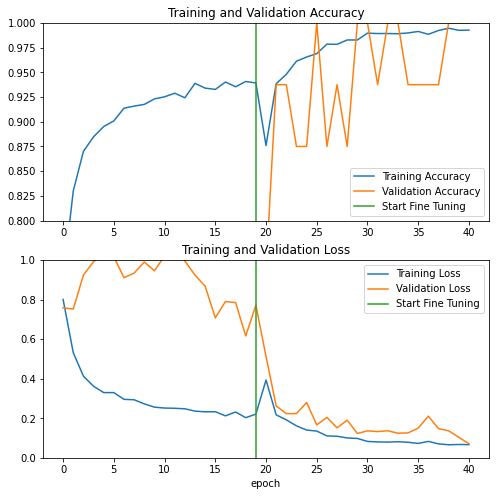

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [38]:
model.save('/')